In [1]:
try:
  # This command only in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import numpy as np
import matplotlib.pyplot as plt

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Get project files
!wget https://cdn.freecodecamp.org/project-data/cats-and-dogs/cats_and_dogs.zip

!unzip cats_and_dogs.zip

PATH = 'cats_and_dogs'

train_dir = os.path.join(PATH, 'train')
validation_dir = os.path.join(PATH, 'validation')
test_dir = os.path.join(PATH, 'test')

# Get number of files in each directory. The train and validation directories
# each have the subdirecories "dogs" and "cats".
total_train = sum([len(files) for r, d, files in os.walk(train_dir)])
total_val = sum([len(files) for r, d, files in os.walk(validation_dir)])
total_test = len(os.listdir(test_dir))

# Variables for pre-processing and training.
batch_size = 128
epochs = 15
IMG_HEIGHT = 150
IMG_WIDTH = 150

Streaming output truncated to the last 5000 lines.
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.60.jpg  
  inflating: cats_and_dogs/train/dogs/dog.858.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.858.jpg  
  inflating: cats_and_dogs/train/dogs/dog.680.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.680.jpg  
  inflating: cats_and_dogs/train/dogs/dog.694.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.694.jpg  
  inflating: cats_and_dogs/train/dogs/dog.864.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.864.jpg  
  inflating: cats_and_dogs/train/dogs/dog.870.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.870.jpg  
  inflating: cats_and_dogs/train/dogs/dog.871.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.871.jpg  
  inflating: cats_and_dogs/train/dogs/dog.865.jpg  
  inflating: __MACOSX/cats_and_dogs/train/dogs/._dog.865.jpg  
  inflating: cats_and_dogs/train/dogs/dog.695.jpg  
  inflating: __MACOSX/cats_and

In [3]:
# 3
train_image_generator = ImageDataGenerator(rescale = 1./255)
validation_image_generator = ImageDataGenerator(rescale = 1./255)
test_image_generator = ImageDataGenerator(rescale = 1./255)

train_data_gen = train_image_generator.flow_from_directory(train_dir, target_size = (IMG_HEIGHT, IMG_WIDTH), batch_size = batch_size, class_mode = 'binary')
val_data_gen = validation_image_generator.flow_from_directory(validation_dir, target_size = (IMG_HEIGHT, IMG_WIDTH), batch_size = batch_size, class_mode = 'binary')
test_data_gen = train_image_generator.flow_from_directory(test_dir, target_size = (IMG_HEIGHT, IMG_WIDTH), shuffle= False, batch_size = batch_size, classes = ['.'], class_mode = None)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 50 images belonging to 1 classes.


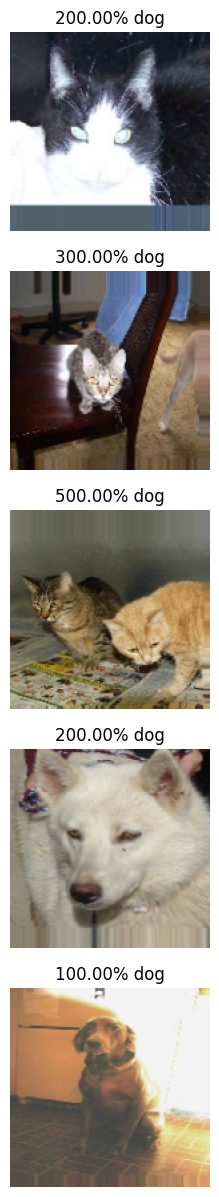

In [15]:
# 4
def plotImages(images_arr, probabilities = False):
    fig, axes = plt.subplots(len(images_arr), 1, figsize=(5,len(images_arr) * 3))
    if probabilities is False:
      for img, ax in zip( images_arr, axes):
          ax.imshow(img)
          ax.axis('off')
    else:
      for img, probability, ax in zip( images_arr, probabilities, axes):
          ax.imshow(img)
          ax.axis('off')
          if probability > 0.5:
              ax.set_title("%.2f" % (probability*100) + "% dog")
          else:
              ax.set_title("%.2f" % ((1-probability)*100) + "% cat")
    plt.show()

sample_training_images, _ = next(train_data_gen)
plotImages(sample_training_images[:5], [2,3,5,2,1])


In [5]:
# 5
train_image_generator = ImageDataGenerator(rescale = 1./255, shear_range =0.2, zoom_range=0.2, horizontal_flip=True, width_shift_range = 0.1, height_shift_range = 0.1)


Found 2000 images belonging to 2 classes.


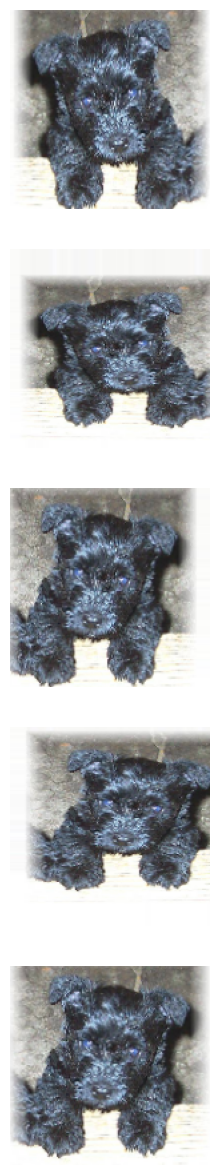

In [6]:
# 6
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                     directory=train_dir,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='binary')

augmented_images = [train_data_gen[0][0][0] for i in range(5)]

plotImages(augmented_images)

In [8]:
# 7
model = Sequential()
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[150, 150, 3]))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 41472)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [11]:
steps_per_epoch = int( np.ceil(total_train / batch_size) )
validation_steps = int( np.ceil(total_val / batch_size) )

print (validation_steps)


8


In [14]:
# 8
history = model.fit(x = train_data_gen, validation_data = val_data_gen, epochs = epochs, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/15
16/16 [==============================] - 66s 4s/step - loss: 0.6812 - accuracy: 0.5680 - val_loss: 0.6578 - val_accuracy: 0.6250
Epoch 2/15
16/16 [==============================] - 69s 4s/step - loss: 0.6700 - accuracy: 0.6045 - val_loss: 0.6617 - val_accuracy: 0.6340
Epoch 3/15
16/16 [==============================] - 66s 4s/step - loss: 0.6501 - accuracy: 0.6265 - val_loss: 0.6312 - val_accuracy: 0.6310
Epoch 4/15
16/16 [==============================] - 69s 4s/step - loss: 0.6403 - accuracy: 0.6500 - val_loss: 0.6287 - val_accuracy: 0.6470
Epoch 5/15
16/16 [==============================] - 66s 4s/step - loss: 0.6375 - accuracy: 0.6575 - val_loss: 0.6162 - val_accuracy: 0.6780
Epoch 6/15
16/16 [==============================] - 66s 4s/step - loss: 0.6212 - accuracy: 0.6755 - val_loss: 0.6368 - val_accuracy: 0.6340
Epoch 7/15
16/16 [==============================] - 68s 4s/step - loss: 0.6226 - accuracy: 0.6640 - val_loss: 0.6129 - val_accuracy: 0.6570
Epoch 8/15
16/16 [==

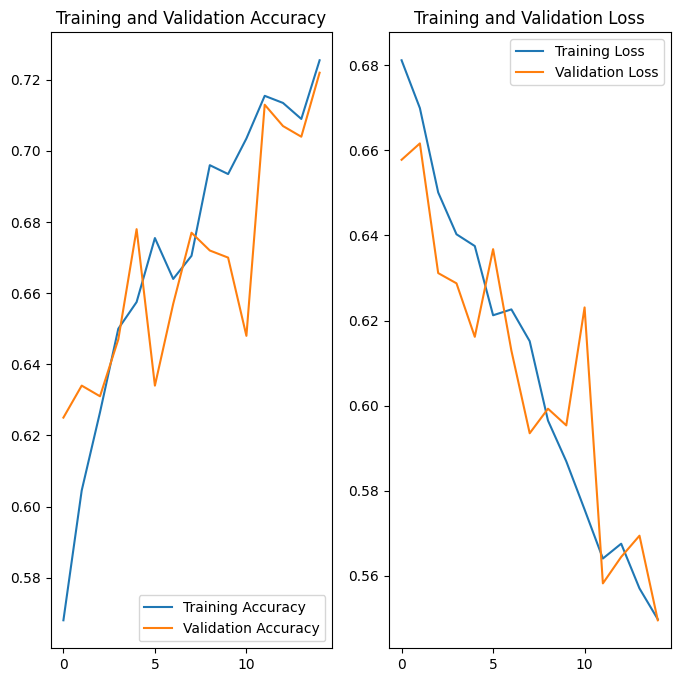

In [16]:
# 9
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [35]:
probabilities = model.predict(test_data_gen, steps=np.ceil(50/test_data_gen.batch_size))
probabilities = probabilities.flatten().tolist()
print (probabilities)


1/1 [==============================] - 0s 376ms/step
[0.39429131150245667, 0.39576125144958496, 0.032518770545721054, 0.8103708028793335, 0.5912155508995056, 0.4800981879234314, 0.8953135013580322, 0.22266879677772522, 0.5562379360198975, 0.7575430870056152, 0.7515342831611633, 0.7891627550125122, 0.40718868374824524, 0.6854462623596191, 0.535749614238739, 0.5461352467536926, 0.8108339309692383, 0.9715815782546997, 0.9316508173942566, 0.6975017786026001, 0.06904818117618561, 0.7188248038291931, 0.4746037423610687, 0.8879249095916748, 0.7278317809104919, 0.4397670328617096, 0.9946929812431335, 0.39805909991264343, 0.4408888816833496, 0.8193289637565613, 0.20822395384311676, 0.11491543054580688, 0.6586198806762695, 0.9999992847442627, 0.13054457306861877, 0.7077419757843018, 0.9931187033653259, 0.8525399565696716, 0.7824678421020508, 0.4548715054988861, 0.4029881954193115, 0.6821690797805786, 0.8985037803649902, 0.8083499073982239, 0.15418101847171783, 0.3900027275085449, 0.6406608223915

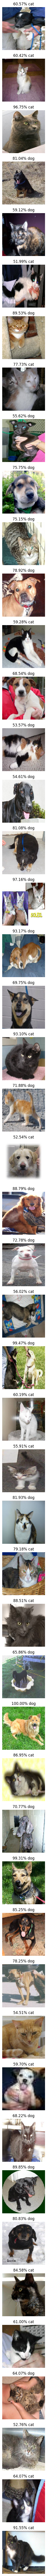

In [36]:
test_plotter = next(test_data_gen)
plotImages(test_plotter, probabilities)